In [ ]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('student_lifestyle_dataset_full..csv')


In [164]:
#get an idea of the dataset
print(df.head())
print(df.info())


   Student_ID  Study_Hours_Per_Day  ...  Gender  Grades
0           1                  6.9  ...    Male    7.48
1           2                  5.3  ...  Female    6.88
2           3                  5.1  ...    Male    6.68
3           4                  6.5  ...    Male    7.20
4           5                  8.1  ...    Male    8.78

[5 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   Stress_Level                     20

In [165]:
print(df.describe())

        Student_ID  ...       Grades
count  2000.000000  ...  2000.000000
mean   1000.500000  ...     7.789825
std     577.494589  ...     0.746777
min       1.000000  ...     5.600000
25%     500.750000  ...     7.250000
50%    1000.500000  ...     7.780000
75%    1500.250000  ...     8.320000
max    2000.000000  ...    10.000000

[8 rows x 7 columns]


<Axes: xlabel='Stress_Level', ylabel='Count'>

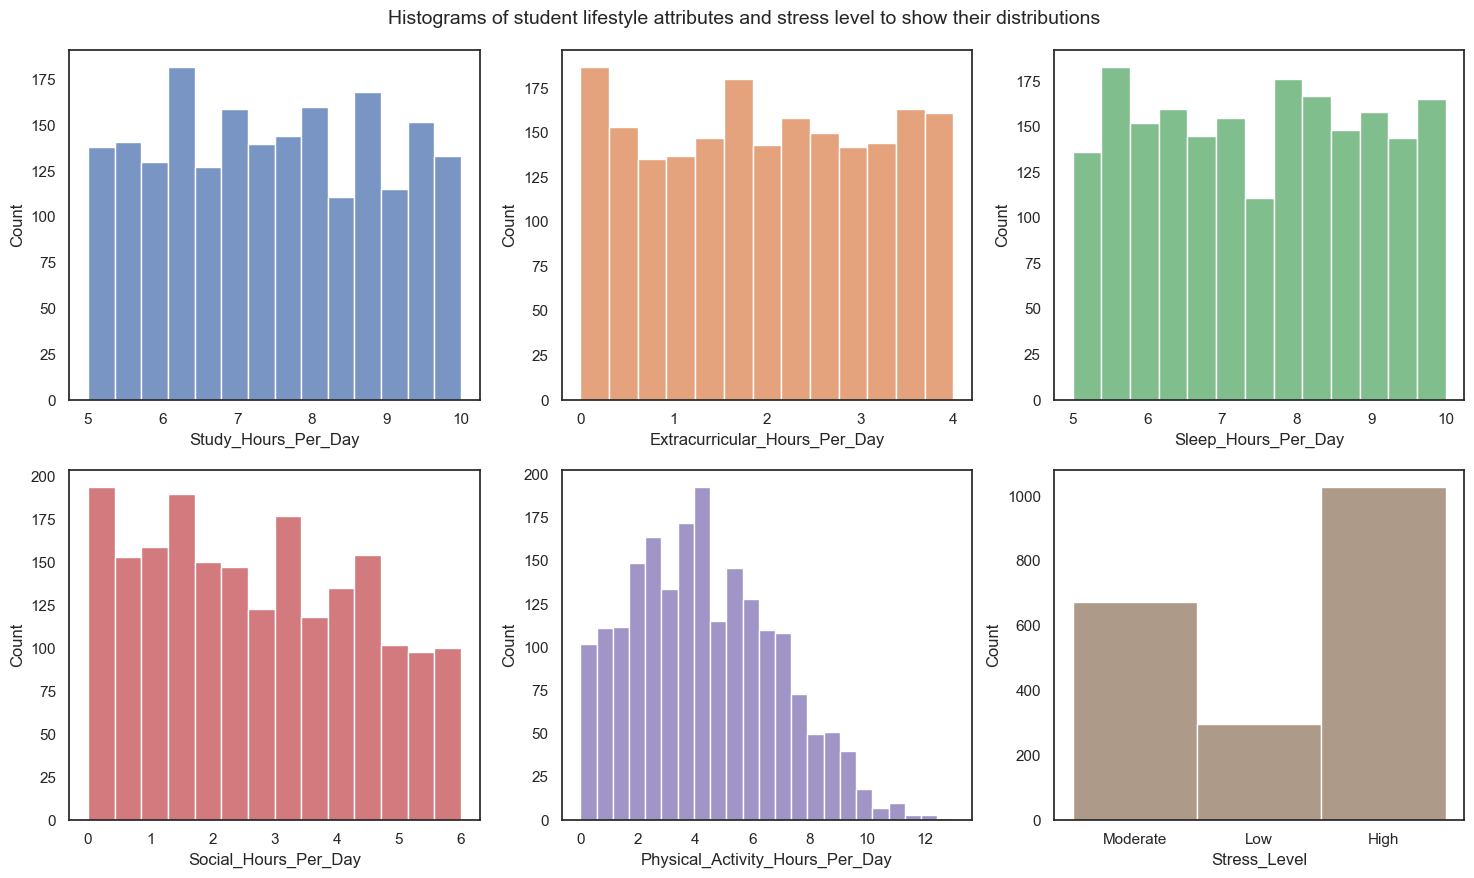

In [206]:
#visualise using seaborn 

palette = sns.color_palette('deep', 7)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle(
    "Histograms of student lifestyle attributes and stress level to show their distributions",
    fontsize=14,
    y=0.92
)

sns.histplot(ax=axes[0, 0], data=df, x='Study_Hours_Per_Day',color=palette[0])
sns.histplot(ax=axes[0, 1], data=df, x='Extracurricular_Hours_Per_Day', color=palette[1])
sns.histplot(ax=axes[0, 2], data=df, x='Sleep_Hours_Per_Day', color=palette[2])

sns.histplot(ax=axes[1, 0], data=df, x='Social_Hours_Per_Day', color=palette[3])
sns.histplot(ax=axes[1, 1], data=df, x='Physical_Activity_Hours_Per_Day', color=palette[4])
sns.histplot(ax=axes[1, 2], data=df, x='Stress_Level', color=palette[5])

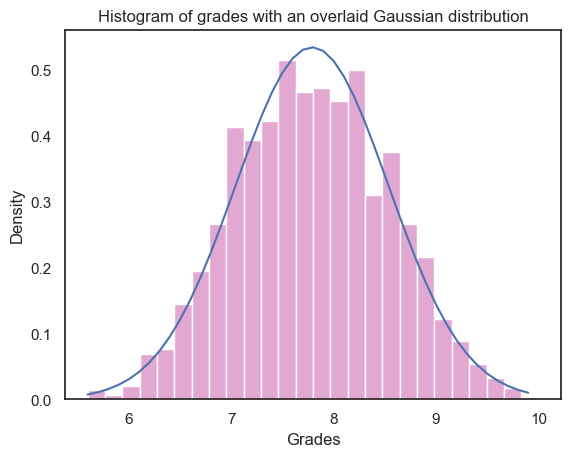

In [194]:
from scipy.stats import norm
# sns.histplot(data=df, x='Grades', color=palette[6])

sns.histplot(data=df, x="Grades", stat="density", color=palette[6]).set_title("Histogram of grades with an overlaid Gaussian distribution")
x_axis = np.arange(df["Grades"].min(), df["Grades"].max(), 0.1)
plt.plot(x_axis, norm.pdf(x_axis, df["Grades"].mean(), df["Grades"].std()))

<Axes: >

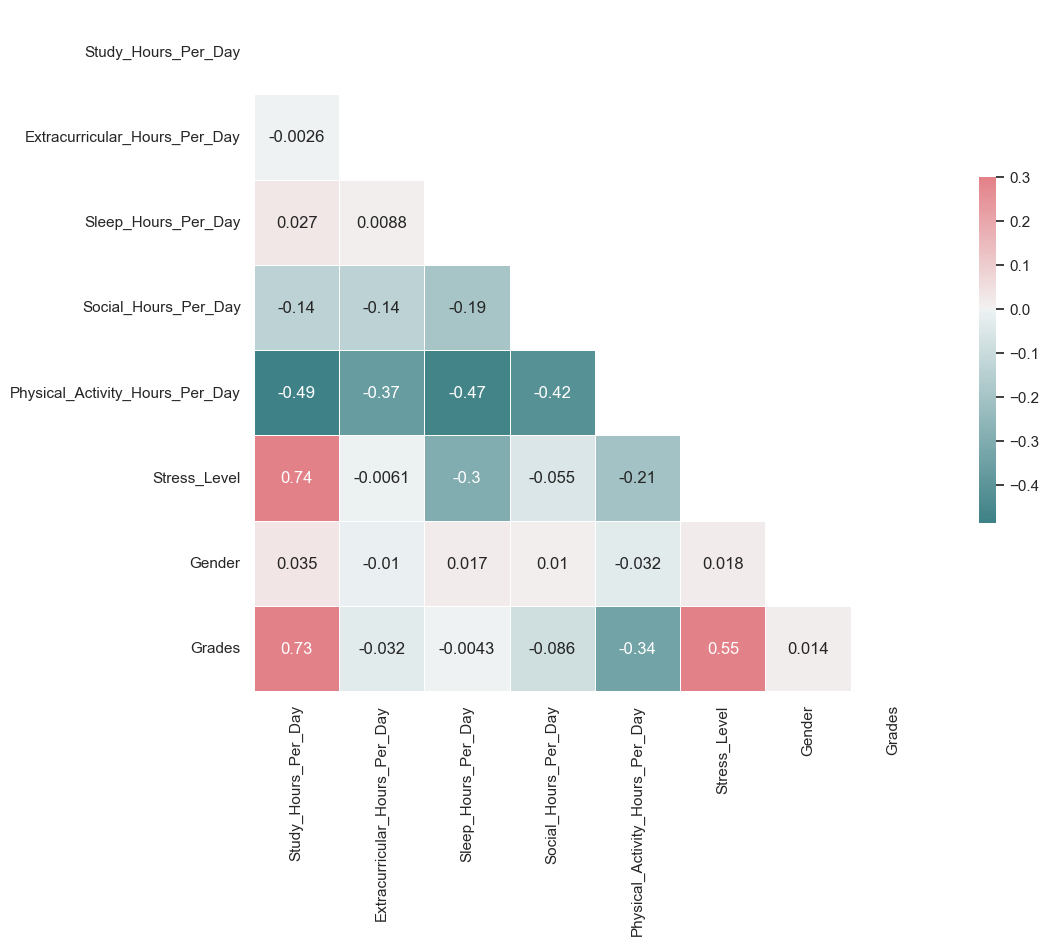

In [141]:
#correlation triangle

sns.set_style("white")  
df2 = df.drop(columns = ['Student_ID'])
stress_level_mapping = {'Low': 0,'Moderate': 1, 'High': 2}
gender_mapping = {'Female': 0, 'Male': 1}
df2['Stress_Level'] = df['Stress_Level'].map(stress_level_mapping)
df2['Gender'] = df['Gender'].map(gender_mapping)


#df2 now is the dataset without the student ID column, and with non-numeric data mapped onto numeric values
corr = df2.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5}, annot=True)

<Axes: xlabel='Stress_Level'>

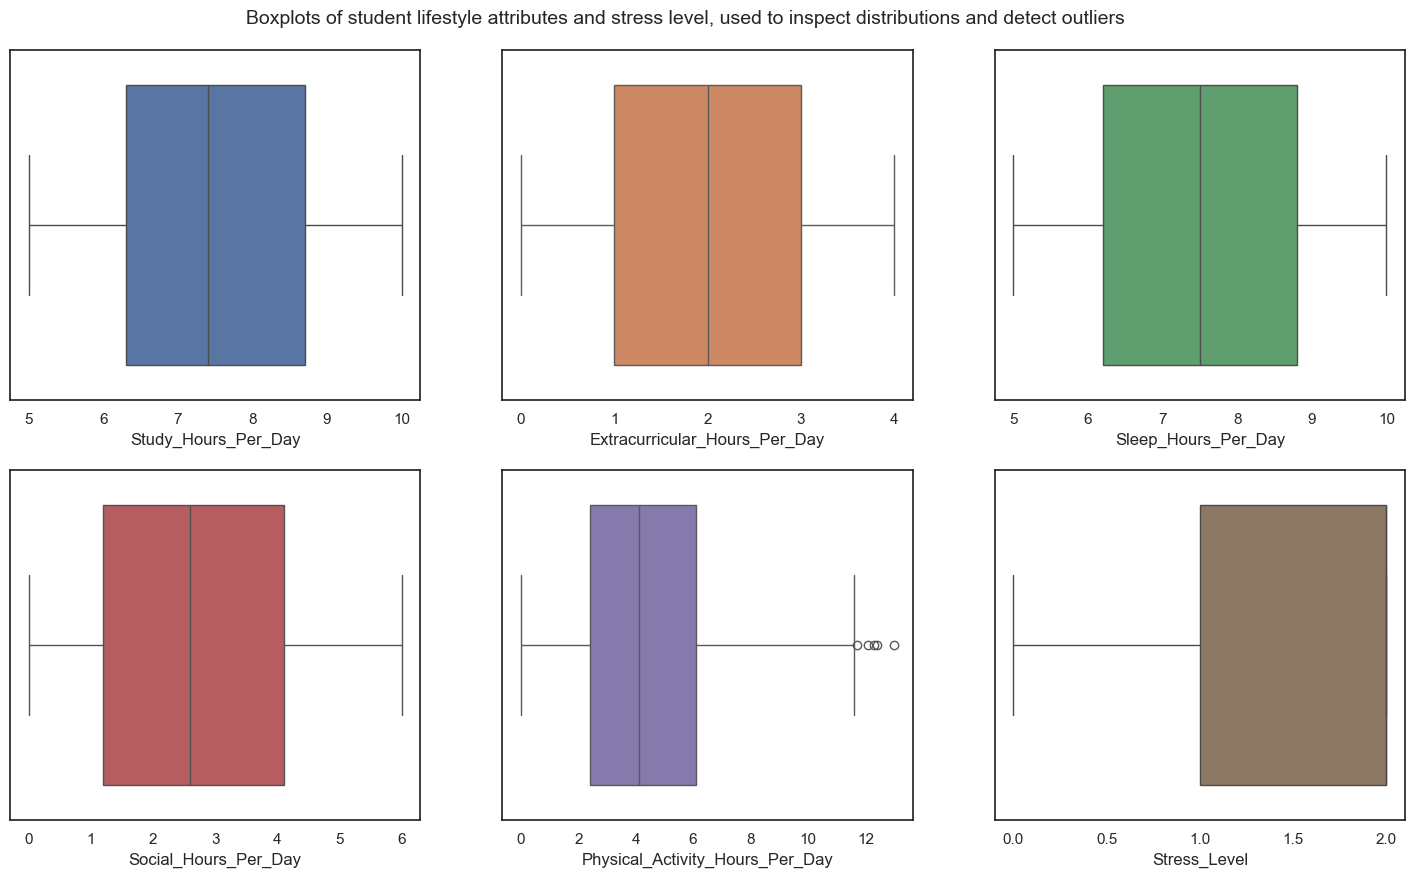

In [201]:
#box plots to find outliers

palette = sns.color_palette('deep', 7)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle(
    "Boxplots of student lifestyle attributes and stress level, used to inspect distributions and detect outliers",
    fontsize=14,
    y=0.92

)

sns.boxplot(ax=axes[0, 0], data=df2, x='Study_Hours_Per_Day',color=palette[0])
sns.boxplot(ax=axes[0, 1], data=df2, x='Extracurricular_Hours_Per_Day', color=palette[1])
sns.boxplot(ax=axes[0, 2], data=df2, x='Sleep_Hours_Per_Day', color=palette[2])
sns.boxplot(ax=axes[1, 0], data=df2, x='Social_Hours_Per_Day', color=palette[3])
sns.boxplot(ax=axes[1, 1], data=df2, x='Physical_Activity_Hours_Per_Day', color=palette[4])
sns.boxplot(ax=axes[1, 2], data=df2, x='Stress_Level', color=palette[5])

<Axes: xlabel='Physical_Activity_Hours_Per_Day'>

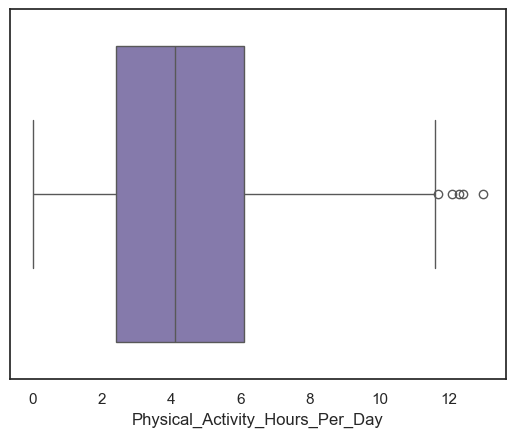

In [150]:
sns.boxplot(data=df2, x='Physical_Activity_Hours_Per_Day', color=palette[4])

In [ ]:
#standardisation

from sklearn.preprocessing import StandardScaler 
corr = df2.corr()

st_sc = StandardScaler()
scaled_df2 = st_sc.fit_transform(df2)     
st_df2 = pd.DataFrame(scaled_df2, columns=df2.columns)            #standardised df2


<Axes: xlabel='Stress_Level', ylabel='Count'>

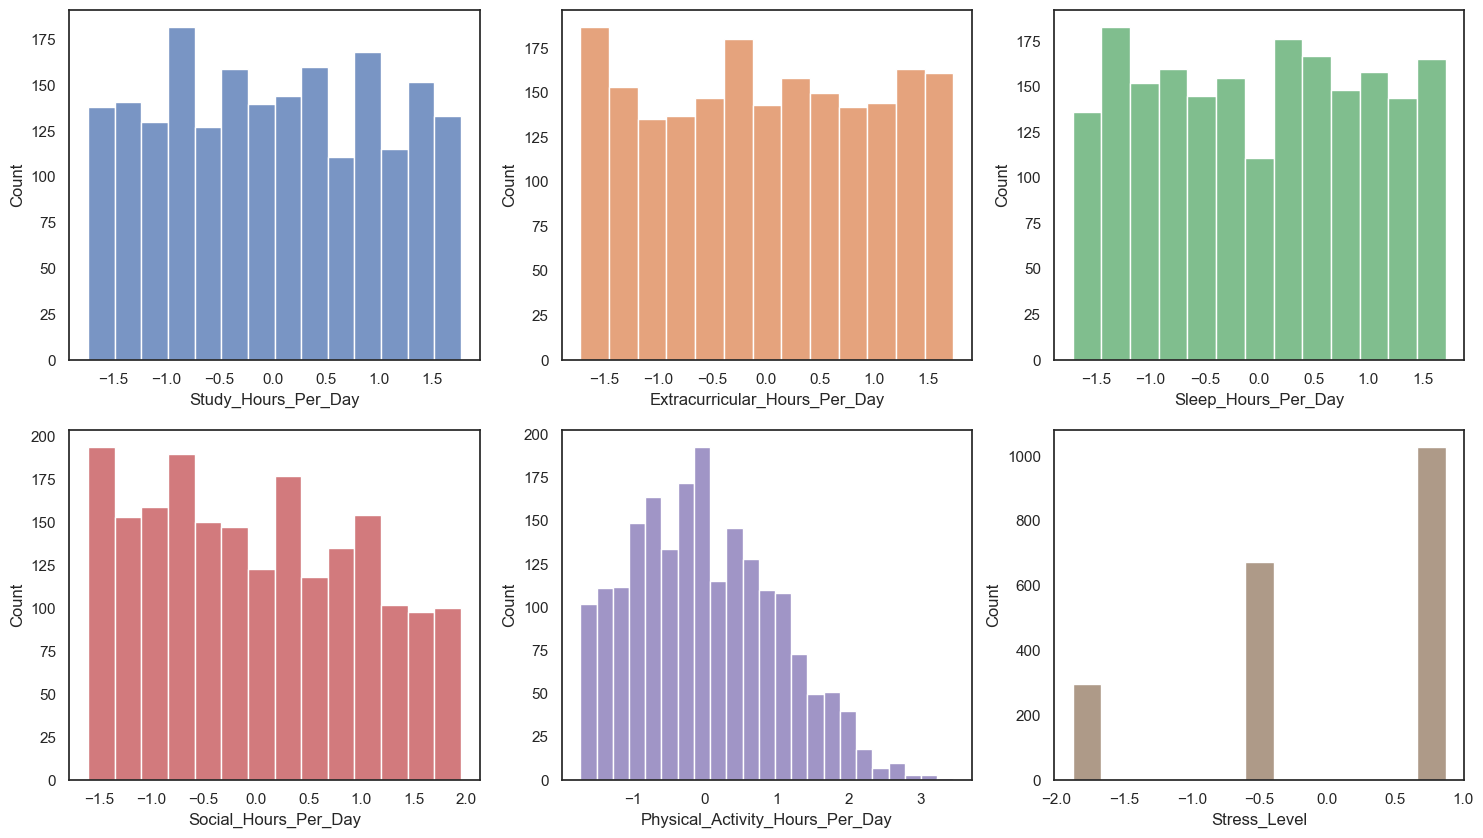

In [153]:
#visualise standardised and cleaned dataset using seaborn 

palette = sns.color_palette('deep', 7)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.histplot(ax=axes[0, 0], data=st_df2, x='Study_Hours_Per_Day',color=palette[0])
sns.histplot(ax=axes[0, 1], data=st_df2, x='Extracurricular_Hours_Per_Day', color=palette[1])
sns.histplot(ax=axes[0, 2], data=st_df2, x='Sleep_Hours_Per_Day', color=palette[2])
sns.histplot(ax=axes[1, 0], data=st_df2, x='Social_Hours_Per_Day', color=palette[3])
sns.histplot(ax=axes[1, 1], data=st_df2, x='Physical_Activity_Hours_Per_Day', color=palette[4])
sns.histplot(ax=axes[1, 2], data=st_df2, x='Stress_Level', color=palette[5])


<Axes: xlabel='Grades', ylabel='Count'>

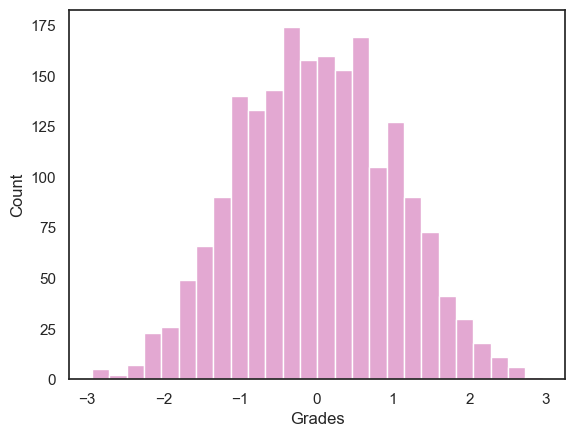

In [154]:
sns.histplot(data=st_df2, x='Grades', color=palette[6])


In [158]:
#PCA 
from sklearn.decomposition import PCA

pca = PCA()
pca_fit = pca.fit(st_df2)
pca_scores = pca.transform(st_df2)

pca_df2 = pd.DataFrame(pca_scores, columns=[f'PC{i+1}' for i in range(st_df2.shape[1])])

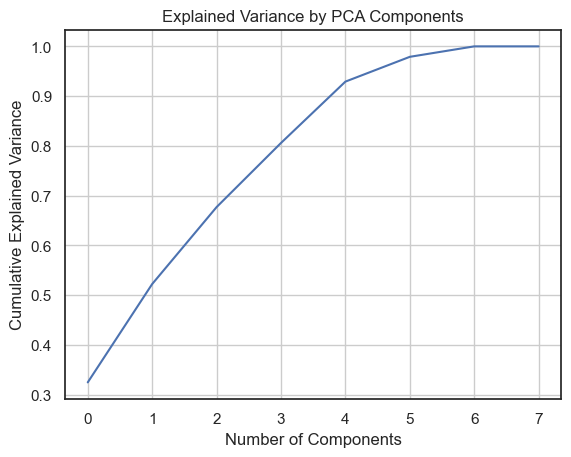

In [ ]:
#plot PCA

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()

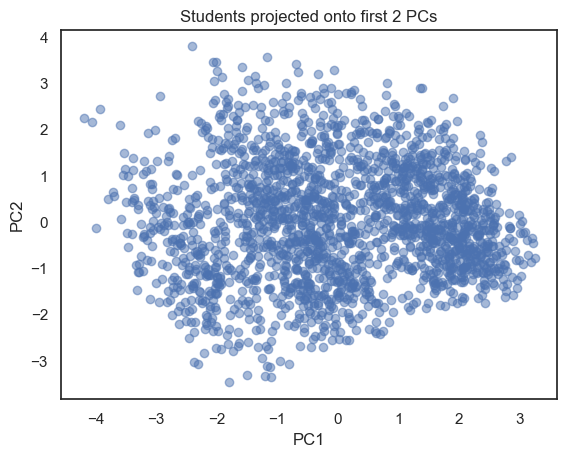

In [163]:
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(st_df2.shape[1])],
                        index=st_df2.columns)

plt.scatter(pca_df2['PC1'], pca_df2['PC2'], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Students projected onto first 2 PCs")
plt.show()